# <div id="0">ML Contents</div>

1. [线性回归 Linear regression ](#1)
2. [逻辑回归 Logistic Regression](#2)
3. [支持向量机 SVM](#3)
4. [K平均 K-Means](#4)
5. [K近邻 KNN](#5)
6. [朴素贝叶斯 BN](#6)
6. [决策树](#7)
7. [随机森林](#8)

## <div id="1">1. 线性回归 Linear regression</div>

目标变量y是连续性变量，如气温、股票价格。

线性回归是一种有监督的学习算法，旨在采用线性方法来建模因变量和自变量之间的关系。换句话说，它的目标是拟合一条最好地捕捉数据关系的线性趋势线，并且，从这条线，它可以预测目标值可能是什么。

> 分类问题和回归问题可以互相转化。

肺癌预测，我们可以用回归模型先预测出患肺癌的概率，然后再给定一个**阈值**，例如50%，概率值在50%以下的人划为没有肺癌，50%以上则认为患有肺癌。

### <div id="10">Contents</div>
[一元线性回归](#11) [损失函数和代价函数](#12) [最小二乘法](#13) [模型评价](#14) [多元线性回归](#15)

### <div id="11">一元线性回归</div>

自变量X单个维度

$$y=α+βx$$

In [107]:
from pandas import Series,DataFrame
import pandas as pd

data = {'训练样本':[1,2,3,4,5],
       '直径（英寸）':[6,8,10,14,18],
       '价格（美元）':[7,9,13,17.5,18]}
df = DataFrame(data)
df

,训练样本,直径（英寸）,价格（美元）
0,1,6,7.0
1,2,8,9.0
2,3,10,13.0
3,4,14,17.5
4,5,18,18.0


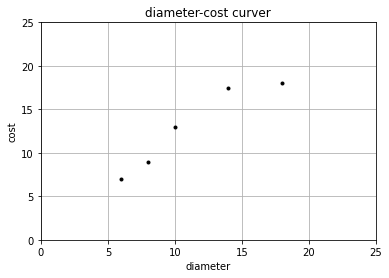

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt
def runplt(size=None):
    plt.figure(figsize=size)
    plt.title(u'diameter-cost curver')
    plt.xlabel(u'diameter')
    plt.ylabel(u'cost')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt

plt = runplt()
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.plot(X, y, 'k.')
plt.show()

In [108]:
from sklearn.linear_model import LinearRegression
import numpy as np
# 创建并拟合模型
model = LinearRegression()
model.fit(X, y)
print('预测一张12英寸匹萨价格：$%.2f' % model.predict(np.array([12]).reshape(-1, 1))[0])

预测一张12英寸匹萨价格：$13.68


In [109]:
w = model.intercept_
b = model.coef_
print("截距为",w, "回归系数为",b)

截距为 [1.96551724] 回归系数为 [[0.9762931]]


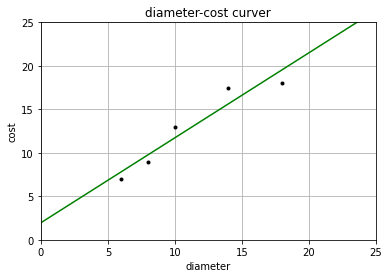

In [133]:
plt = runplt()
plt.plot(X, y, 'k.')

model = LinearRegression()
model.fit(X,y)

X2 = [[0], [5], [14], [25]]
y2 = model.predict(X2)

plt.plot(X2, y2, 'g-')
plt.show()

In [119]:
y_pred=model.predict(X)
y_pred

array([[ 7.82327586],
       [ 9.77586207],
       [11.72844828],
       [15.63362069],
       [19.5387931 ]])

[Back to Chapter1 contents](#10)

[Back to Total contents](#0)

### <div id="12">损失函数(Loss function)和代价函数(Cost function)（？实际好像差不多）</div>

模型预测的数值与训练集数据的差异称为残差（residuals）

**损失函数**

计算的是一个样本的误差。

损失函数是定义在单个训练样本上的，也就是就算一个样本的误差，比如我们想要分类，就是预测的类别和实际类别的区别，是一个样本的哦，用L表示。

**代价函数**

是整个训练集上所有样本误差的平均。

代价函数是定义在整个训练集上面的，也就是所有样本的误差的总和的平均，也就是损失函数的总和的平均，有没有这个平均其实不会影响最后的参数的求解结果。

常用残差平方和（RSS）、均方误差(MSE)、均方根误差(RMSE)、平均绝对误差(MAE)

**残差平方和（RSS）**

等同于SSE（误差项平方和）

实际值与预测值之间差的平方之和。

In [129]:
import numpy as np
print('残差平方和:{:.2f}'.format(np.mean((model.predict(X) - y) ** 2)))

残差平方和:1.75


**（常用）均方误差MSE: Mean Squared Error**

均方误差是RSS的期望值（或均值）;

MSE 等於1/n 倍的残差平方和(RSS)

MSE可以评价数据的变化程度，MSE的值越小，说明预测模型描述实验数据具有更好的精确度。


In [120]:
from sklearn.metrics import mean_squared_error as MSE

print('MSE为：',MSE(y,y_pred))

MSE为： 1.7495689655172406


**均方根误差RMSE**

均方根误差是均方误差的算术平方根

In [162]:
RMSE = np.sqrt(MSE(y, y_pred))

print('RMSE为：',RMSE)

RMSE为： 1.3227127297781784


**（常用）平均绝对误差MAE :Mean Absolute Error**

平均绝对误差是绝对误差的平均值

平均绝对误差能更好地反映预测值误差的实际情况.

In [121]:
from sklearn.metrics import mean_absolute_error as MAE

print(MAE(y,y_pred))

1.2551724137931035


**标准差SD :standard Deviation**

标准差是方差的算术平方根。

标准差能反映一个数据集的离散程度。平均数相同的两组组数据，标准差未必相同。

[Back to Chapter1 contents](#10)

[Back to Total contents](#0)

### <div id="13">最小二乘法</div>

基于**均方误差（cost function）最小化**来进行模型求解的方法称为“最小二乘法”（leastsquare method）

一元线性回归拟合模型的参数估计常用方法是普通最小二乘法（ordinary least squares ）或线性最小二乘法（linear least squares）

利用最小二乘法可以简便地求得一个通过某个函数计算得到的预测值，然后使得这些求得的数据与真实数据之间误差（差距）的平方和为最小。

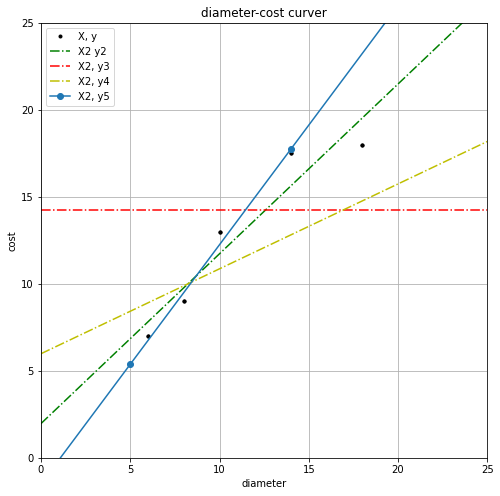

In [136]:
# 如何判断最佳拟合

plt = runplt(size=(8,8))
plt.plot(X, y, 'k.')
y3 = [14.25, 14.25, 14.25, 14.25]
y4 = y2*0.5 + 5
model.fit(X[1:-1], y[1:-1])
y5 = model.predict(X2)
plt.plot(X, y, 'k.', label="X, y") 
plt.plot(X2, y2, 'g-.', label="X2 y2")
plt.plot(X2, y3, 'r-.',label="X2, y3")
plt.plot(X2, y4, 'y-.',label="X2, y4")
plt.plot(X2, y5, 'o-', label="X2, y5")
plt.legend()
plt.show()

$$cov(x,y)=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{n-1}$$

In [145]:
# 根据概率论公式计算

xbar=(6+8+10+14+18)/5
ybar=(7+9+13+17.5+18)/5

cov=((6-xbar)*(7-ybar)+(8-xbar)*(9-ybar)+
    (10-xbar)*(13-ybar)+(14-xbar)*(17.5-ybar)+
    (18-xbar)*(18-ybar))/(5-1)
cov

22.65

In [149]:
# 或使用Numpy
import numpy as np

# 不加[0][1]结果是矩阵，[0][1]表示第0行第1列
np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1]

22.65

$$var(x)=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}{n-1}$$

In [143]:
# 根据概率论公式计算

var=((6-xbar)**2+(8-xbar)**2+
          (10-xbar)**2+(14-xbar)**2
          +(18-xbar)**2)/(5-1)
var

23.2

In [140]:
# 或使用Numpy

np.var([6, 8, 10, 14, 18], ddof=1)

23.2

$$β=\frac{cov(x,y)}{var(x)}$$

In [152]:
β=cov/var
β

0.9762931034482758

$$α=\bar{y}-β\bar{x}$$

In [155]:
α=ybar-β*xbar
α

1.9655172413793114

In [159]:
# 和LinearRegression模型参数对比

print(w[0],b[0][0])
print(α,β)

1.965517241379315 0.9762931034482755
1.9655172413793114 0.9762931034482758


[Back to Chapter1 contents](#10)

[Back to Total contents](#0)

### <div id="14">模型评价（使用测试集）（懒得建了主要看方法）</div>

**皮尔逊相关系数**

衡量线性相关性的强弱，range[-1,1],相关程度越高越趋近于-1（负相关）/1（正相关），0表示不存在线性相关关系。


In [127]:
pccs=df['直径（英寸）'].corr(df['价格（美元）'],method="pearson")
pccs1=df['直径（英寸）'].cov(df['价格（美元）'])/(df['直径（英寸）'].std()*df['价格（美元）'].std())
print(pccs)
print(pccs1)

0.9539400381701201
0.9539400381701201


**决定系数R^2**

也称拟合优度，一般用在线性回归模型中用于评估预测值和实际值的符合程度。越接近1说明拟合程度越好。

<center>TSS=ESS+RSS</center>

总体平方和（Total Sum of Squares）

回归平方和（Explained Sum of Squares）

残差平方和（Residual Sum of Squares）


In [128]:
# .score返回r^2系数
model.score(X,y)

0.9100015964240102

[Back to Chapter1 contents](#10)

[Back to Total contents](#0)

### <div id="15">多元线性回归</div>

自变量X有多个维度，模型优化主要为扩大训练集和去除异常值。

In [170]:
from sklearn import datasets

data = datasets.load_boston() # data(feature) and target

E:\Anaconda3\envs\python3.7\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [171]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [173]:
y = pd.DataFrame(data.target, columns=['MEDV'])
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [176]:
# 划分训练集和测试集

from sklearn.model_selection import cross_val_predict, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [179]:
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[[-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
  -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
   3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
  -5.44644997e-01]]
[42.93352585]


In [180]:
# 评估

y_pred = model.predict(X_test)
print('MSE为：',MSE(y_test,y_pred))
print('RMSE为：',np.sqrt(MSE(y_test,y_pred)))

MSE为： 23.380836480270442
RMSE为： 4.83537345820056


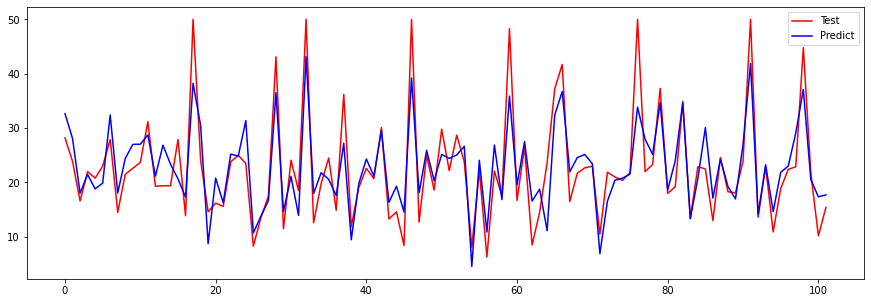

In [183]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test, 'r', label='Test')
plt.plot(range(len(y_test)), y_pred, 'b', label='Predict')
plt.legend()

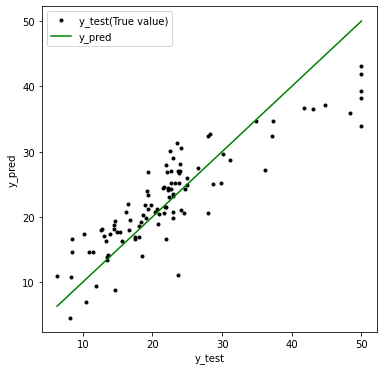

In [198]:
# y_test=40-50时有较多异常值

plt.figure(figsize=(6,6))
plt.plot(y_test, y_pred,'k.',label="y_test(True value)")
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'g-',label="y_pred")
plt.legend()
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

[Back to Chapter1 contents](#10)

[Back to Total contents](#0)

## <div id="2">2. 逻辑回归 Logistic Regression, Classification</div>

目标变量y是分类型变量，如性别（男、女），使用分类模型。常用逻辑回归模型。

logisitc回归的结果并非数学定义中的概率值，不可以直接当做概率值来用。该结果往往用于和其他特征值加权求和，而非直接相乘。

逻辑回归是以线性回归为理论支持的，但是逻辑回归通过Sigmoid函数引入了非线性因素，因此可以轻松处理0/1分类问题。

https://zhuanlan.zhihu.com/p/28408516

https://www.cnblogs.com/nrocky/p/13773310.html

### <div id="20">Contents</div>
[假设函数](#21) [决策边界](#22) [Iris实例](#23) [代价函数-交叉熵](#24) [多元逻辑回归](#25)

### <div id="21">假设函数（Hypothesis function）</div>

可以看到在趋于正无穷或负无穷时，函数趋近平滑状态，sigmoid函数因为输出范围（0，1），所以二分类的概率常常用这个函数

Sigmoid函数形式为：

$$g(z)= \frac{1}{1+e^{-z}}$$

- 值域在0和1之间

- 函数具有非常好的对称性

- 函数对输入超过一定范围就会不敏感

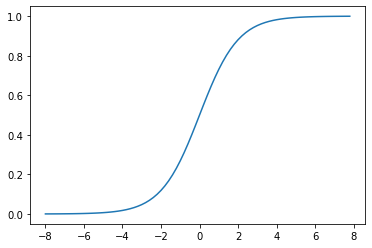

In [214]:
import numpy as np
import matplotlib.pyplot as plt

# 返回dy为导数图像，返回y为函数图像
def sigmoid(x):
    y=1/(1+np.exp(-x))
    # dy=y*(1-y)
    return y

def plot_sigmoid():
    # param:起点，终点，间距
    x = np.arange(-8, 8, 0.2)
    y = sigmoid(x)
    plt.plot(x, y)
    plt.show()
    
if __name__ == '__main__':
    plot_sigmoid()

逻辑回归的假设函数形式为：

$$h_\theta(x) = g(\theta^T x), g(z)= \frac{1}{1+e^{-z}}$$
由此：

$$h_\theta(x)= \frac{1}{1+e^{-\theta^Tx}}$$
$x$为输入,$\theta$为要求的参数

模型实际上是将决策函数限定在某一组条件下，限定条件决定了模型的假设空间。逻辑回归模型所作的假设为：
$$P(y=1|x;\theta) =g(\theta^Tx)= \frac{1}{1+e^{-\theta^Tx}}$$
即在给定条件($x;\theta$)的情况下,$y=1$的概率


$$y^* = 1, if P(y=1|x)>0.5$$
选择0.5作为阈值是一个一般的做法，实际应用时特定的情况可以选择不同阈值，如果对正例的判别准确性要求高，可以选择阈值大一些，对正例的召回要求高，则可以选择阈值小一些。

[Back to Chapter2 contents](#20)

[Back to Total contents](#0)

### <div id="22">决策边界（Decision Boundary）</div>

决策边界，也称为决策面，是用于在N维空间，将不同类别样本分开的平面或曲面。实际上决策边界是一个方程，由$\theta^T x=0$定义

>注意：决策边界是假设函数的属性，由$\theta$决定，而不是由数据集的特征决定。

$y^* = 1, if P(y=1|x)>0.5$用于计算样本类别，$\theta^T x=0$是用于标识出分类函数（模型）分类边界的方程。

**线性决策边界**

![avatar](https://pic1.zhimg.com/80/v2-d75eb1a5ac935aafb0adba3ec1073cf8_720w.webp)

**非线性决策边界**

![avatar](https://pic1.zhimg.com/80/v2-5687064adfc823e35f3eec13f51be97c_720w.webp)


[Back to Chapter2 contents](#20)

[Back to Total contents](#0)

### <div id="23">Iris实例</div>

https://blog.51cto.com/u_13597899/5327397

避免过拟合（模型精度过高，对于新数据表现较差）：

正则化 - 减弱模型精度，提高泛化效果

减少模型feature

二分类情况下，数据量小，一般默认的'liblinear'的行，数据量大，则使用'sag'。多分类的情况下，在数据量小的情况下，追求高精度，可以用'newton-cg'或'lbfgs'以'MvM'的方式求解。数据量一大还是使用'sag'。

In [ ]:
def LogisticRegression(penalty='l2', # 正则化选项，默认L2，L2可用参数solver{‘newton-cg’,‘lbfgs’,‘liblinear’,‘sag’},L1可用{‘liblinear’}
                                    dual=False, 
                                    tol=1e-4, 
                                    C=1.0, #是LogisticRegression构造函数的参数，正则化系数的倒数，必须为正的浮点数，默认为1.0，这个值越小，说明正则化效果越强。换句话说，这个值越小，越训练的模型更泛化，但也更容易欠拟合。
                                    fit_intercept=True, 
                                    intercept_scaling=1, 
                                    class_weight=None,
                                    random_state=None, 
                                    solver='warn', #损失函数优化算法
                                    max_iter=100,
                                    multi_class='warn', # 分类方式 ovr,mvm
                                    verbose=0, 
                                    warm_start=False, 
                                    n_jobs=None,
                                    l1_ratio=None
                      )

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as Lr

In [7]:
# 加载鸢尾花数据
iris = datasets.load_iris()

In [17]:
X = iris.data[:, :2]  
Y = iris.target

model = Lr(C=1e5)
model.fit(X,Y)

LogisticRegression(C=100000.0)

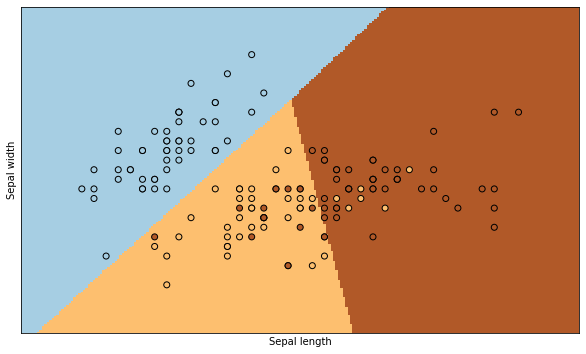

In [20]:
h=.02

# 绘制决策边界。为此我们将为网格 [x_min, x_max]x[y_min, y_max] 中的每个点分配一个颜色。
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# 将结果放入彩色图中
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# 将训练点也同样放入彩色图中
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

[Back to Chapter2 contents](#20)

[Back to Total contents](#0)

### <div id="24">代价函数 - 交叉熵(Cross Entropy)</div>

In [219]:
from sklearn.metrics import log_loss

# 二分类的交叉熵损失函数
# 利用sklearn模块的计算结果
y_true = [0, 0, 1, 1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]
log_loss = log_loss(y_true, y_pred)
print('Loss is %s.'%log_loss)

Loss is 0.1738073366910675.


[Back to Chapter2 contents](#20)

[Back to Total contents](#0)

### <div id="25">多元逻辑回归</div>

实际上二元逻辑回归的模型和损失函数很容易推广到多元逻辑回归。比如总是认为某种类型为正值，其余为0值。

One-vs-rest,OvR，如分类A、B、C三类，将A作为正向数据，其余作为负向数据。

Many-vs-Many，MvM，选择一部分类别的样本和另一部分类别的样本来做逻辑回归二分类。即A，B作为正向数据，C作为负向数据，训练出一个分模型。再将A，C作为正向数据，B作为负向数据，训练出一个分类模型。最后B，C作为正向数据，C作为负向数据，训练出一个模型。MvM中最常用的是One-vs-One(OvO),OvO是MvM的特例。即每次选择两类样本来做二元逻辑回归。

通常情况下，Ovr比较简单，速度也比较快，但模型精度上没MvM那么高。MvM则正好相反，精度高，但速度上比不过Ovr。

[Back to Chapter2 contents](#20)

[Back to Total contents](#0)

## <div id="3">3. 支持向量机SVM Classification</div>
https://www.cnblogs.com/jpcflyer/p/11082443.html

### <div id="30">Contents</div>
[分类间隔](#31) [SVM类型](#32) [SVM调参](#33) [乳腺癌检测实例](#34) [GridSearchCV调参实例](#35)

### <div id="11">分类间隔</div>

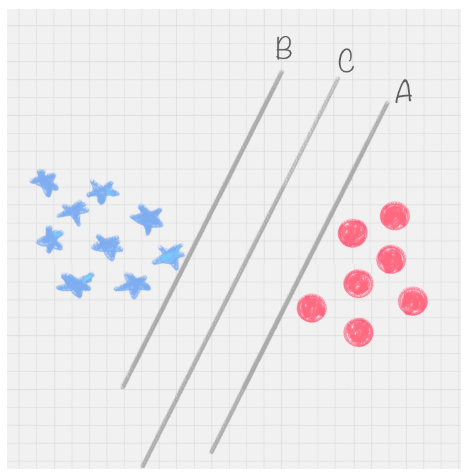

相比于直线 A 和直线 B，直线 C 的划分更优，因为它的鲁棒性更强。

在保证决策面不变，且分类不产生错误的情况下，我们可以移动决策面 C，直到产生两个极限的位置：如图中的决策面 A 和决策面 B。极限的位置是指，如果越过了这个位置，就会产生分类错误。这样的话，两个极限位置 A 和 B 之间的分界线 C 就是最优决策面。极限位置到最优决策面 C 之间的距离，就是“分类间隔”，英文叫做 margin。
 
如果我们转动这个最优决策面，你会发现可能存在多个最优决策面，它们都能把数据集正确分开，这些最优决策面的分类间隔可能是不同的，而那个**拥有“最大间隔”（max margin）的决策面**就是 SVM 要找的最优解。
 

### <div id="32">SVM类型</div>

### <div id="33">SVM调参</div>

- 对训练数据和测试数据最好都做归一化
- 如果特征非常多，或者样本数远少于特征数时，数据更偏向线性可分，用线性核函数效果就会很好
- 优先选择线性核函数，如果拟合不好同，再推荐默认的高斯（rbf),因为高斯需要通过交叉验证选择适合的惩罚系数C和gamma
- 理论上高斯不会比线性核差，但是高斯需要花非常多的时间在调参上，实际业务中能用线性就用线性

### <div id="34">乳腺癌检测实例（有explore et cleaning）</div>

https://zhuanlan.zhihu.com/p/124919408
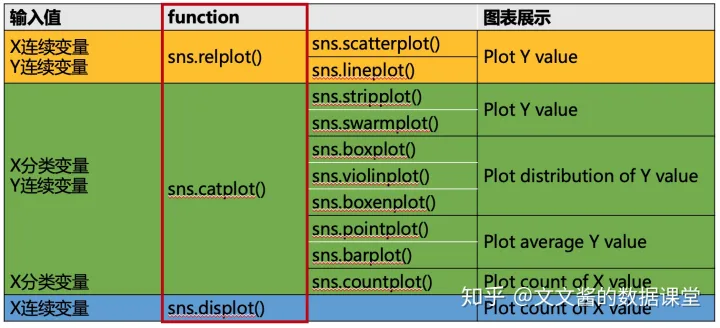

In [1]:
from sklearn import svm
import pandas as pd

data=pd.read_csv("data.csv")

In [2]:
pd.set_option('display.max_columns', None)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# data cleaning
data.drop(columns='id',axis=1,inplace=True) #axis(0:行,1:列) inplace True表示删除后原df变化
# 良性B替换为0，恶性M替换为1
data['diagnosis']=data['diagnosis'].map({'B':0,'M':1})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
feature_means= list(data.columns[1:11])
feature_se= list(data.columns[11:21])
feature_worst=list(data.columns[21:31])

In [6]:
import numpy as np
import seaborn as sns #依赖 numpy pandas matplotlib scipy
import matplotlib.pyplot as plt
from scipy import stats,integrate

E:\Anaconda3\envs\python3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


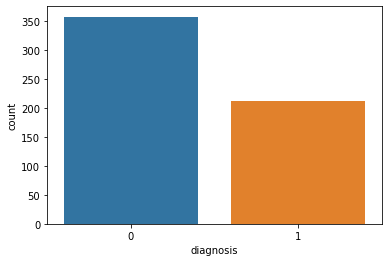

In [7]:
sns.countplot(data['diagnosis'],label="Count")
plt.show()

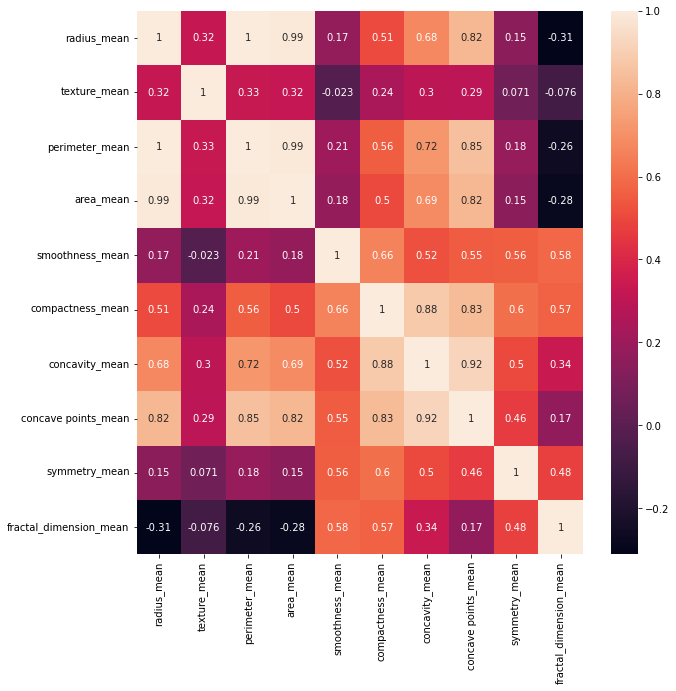

In [43]:
# heatmap - feature selecting
corr=data[feature_means].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dimension reduction according to the heatmap
feature_remain = ['radius_mean','texture_mean', 
                   'smoothness_mean','compactness_mean',
                   'symmetry_mean', 'fractal_dimension_mean']

X_train, X_test, y_train, y_test = train_test_split(data[feature_remain], 
                                                    data['diagnosis'], test_size=0.3)

# Normalization (Avoid overfitting,for train set)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

metrics summary

https://blog.csdn.net/Huang_Fj/article/details/124100598

In [39]:
# creat svm model
from sklearn import metrics

model=svm.SVC()
model.fit(X_train,y_train)
pred=model.predict(X_test)

report = metrics.classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       102
           1       0.95      0.77      0.85        69

    accuracy                           0.89       171
   macro avg       0.90      0.87      0.88       171
weighted avg       0.90      0.89      0.89       171



Text(0.5, 1.0, 'ROC curve')

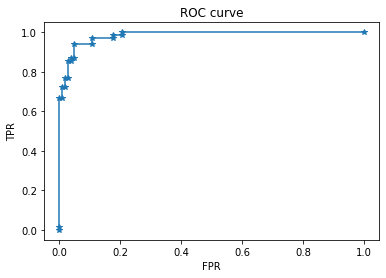

In [42]:
scores=model.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,scores)
auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'*-')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')

### <div id="35">GridSearchCV调参实例</div>

https://blog.csdn.net/cindy407/article/details/94014321

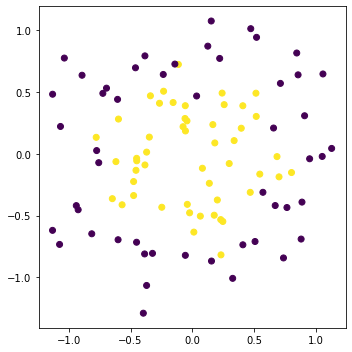

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,datasets
from sklearn.svm import SVC
from sklearn.datasets import make_moons,make_circles,make_classification

# make_circles是环形，noise是加一点噪音，factor是两个圆形的距离
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1],c=y)
plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Linear SVM
lrModel=svm.SVC(kernel='linear')
lrModel.fit(X_train,y_train)
print('The score of linear SVM is',lrModel.score(X_test,y_test))

The score of linear SVM is 0.36666666666666664


In [6]:
# Apply the GridSearchCV
from sklearn.model_selection import GridSearchCV

# SVC默认是高斯核，高斯核函数有2个参数c和gamma,CV 是将训练集分成多少从来进行交叉验证
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid={'C':np.linspace(0.1,10,50)}, cv=4)
grid.fit(X_train,y_train)
print('grid_best_params:',  grid.best_params_)
print('grid.best_score_:', grid.best_score_)


grid_best_params: {'C': 0.1}
grid.best_score_: 0.5571895424836601


In [8]:
# Apply GrinSearch for non-linear SVM
param_grid=[{"kernel":['rbf'],"C":[0.1,1,10],"gamma":[1,0.1,0.01]},
           {"kernel":['poly'],"C":[0.1,1,10],"gamma":[1,0.1,0.01],"degree":[3,5,10],"coef0":[0,0.1,1]},
           {"kernel":['sigmoid'],"C":[0.1,1,10],"gamma":[1,0.1,0.01],"coef0":[0,0.1,1]}]

grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=4)
grid.fit(X_train,y_train)

print('grid_best_params:',  grid.best_params_)
print('grid.best_score_:', grid.best_score_)

grid_best_params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
grid.best_score_: 0.9125816993464052


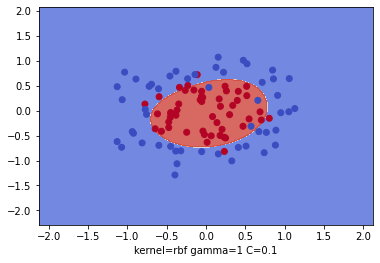

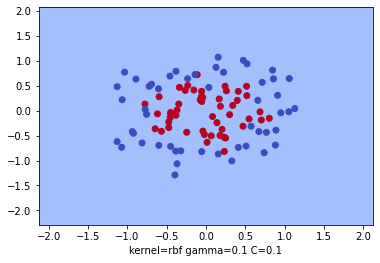

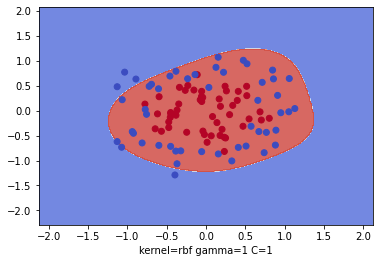

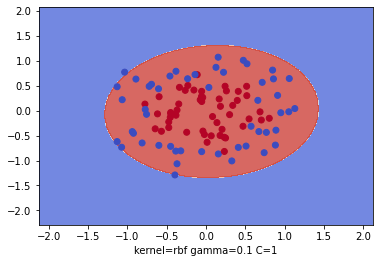

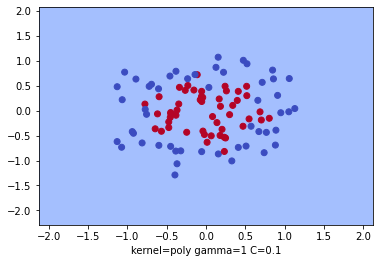

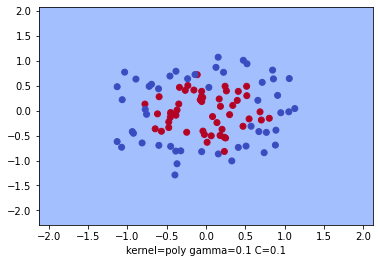

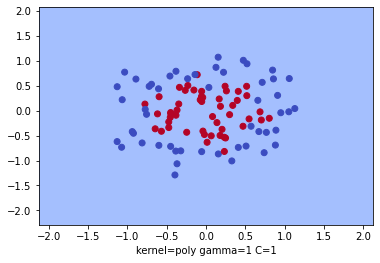

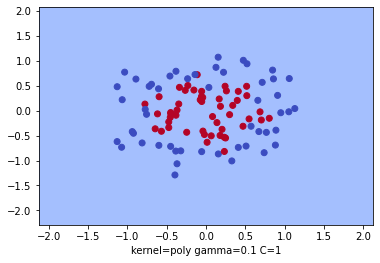

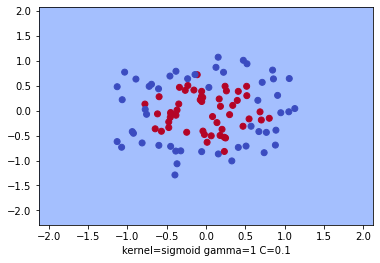

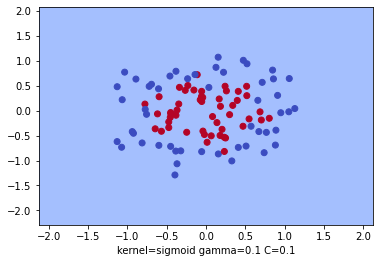

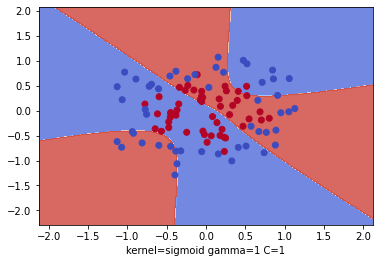

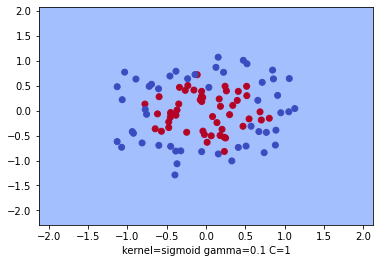

In [18]:
# visualization
for i, kernel in enumerate(('rbf','poly','sigmoid')):
    for j,C in enumerate((0.1,1)):
        for k, gamma in enumerate((1,0.1)):
            plt.subplot()
            model=svm.SVC(kernel=kernel,C=C,gamma=gamma)
            model.fit(X_train,y_train)
            # np.ravel():Return a contiguous flattened array.
            # array([[1, 2, 3], [4, 5, 6]])->array([1, 2, 3, 4, 5, 6])
            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            # np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。
            # np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
            
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
            plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
            # set X Y limits 横纵坐标
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())
            plt.xlabel('kernel='+str(kernel)+' gamma=' + str(gamma) + ' C=' + str(C))
            plt.show()

[Back to Chapter3 contents](#30)

[Back to Total contents](#0)

## <div id="4">4. K-Means（硬聚类） Clustering  </div>

K-means 是常用的基于欧式距离的聚类算法，其认为两个目标的距离越近，相似度越大。

- 硬聚类（hard clustering）指的是数据集中每个样本只能划至一个簇的算法。
- 软聚类（soft clustering，有时也称作模糊聚类（fuzzy clustering）算法可以将一个样本划分到一个或者多个簇。

https://zhuanlan.zhihu.com/p/78798251

https://www.pythonheidong.com/blog/article/332182/b916d1558a91f69ce93d/

**算法步骤**
- 选择初始化的 k 个样本作为初始聚类中心$a=a_{1},a_{2},...,a_{k}$
- 针对数据集中每个样本$x_{i}$计算它到$k$个聚类中心的距离并将其分到距离最小的聚类中心所对应的类中
- 针对每个类别$a_{j}$，重新计算它的聚类中心$a_j=\frac{1}{\left| c_i \right|}\sum_{x\in c_i}x$（即属于该类的所有样本的质心）
- 重复上面2、3两步操作，直到达到某个中止条件（迭代次数、最小误差变化等）。

**优缺点**
- 易理解
- k值需要人为设定，不同 K 值对K-means影响很大（手肘法、Gap statistic）
- 对初始的簇中心敏感，不同选取方式会得到不同结果
- 对异常值敏感（K-means之前要进行数据归一化/标准化，异常点检测）
- 样本只能归为一类，不适合多标签任务（硬聚类）

### <div id="40">Contents</div>
[正态分布判断](#41) [K-Means算法优化](#42) [K-Means实例](#43)

### <div id="41">如何判断一组数据是否符合正态分布（高斯分布）-归一化和标准化</div>

https://blog.csdn.net/laobai1015/article/details/107845838

**画图**

<AxesSubplot:>

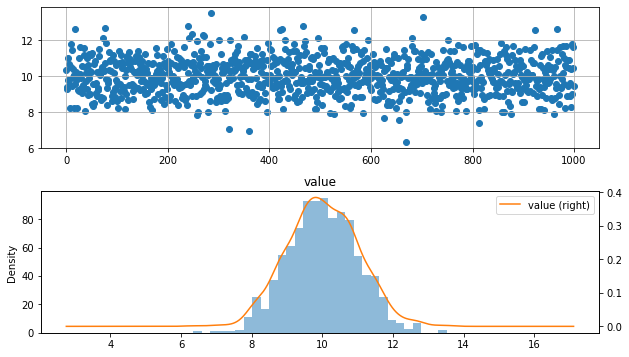

In [30]:
#导入模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 
#构造一组随机数据
s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])
 
#画散点图和直方图
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # 创建子图1
ax1.scatter(s.index, s.values)
plt.grid()
 
ax2 = fig.add_subplot(2,1,2)  # 创建子图2
s.hist(bins=30,alpha = 0.5,ax = ax2)
s.plot(kind = 'kde', secondary_y=True,ax = ax2)

**ks检验**

pvalue>值大于0.05为正态分布

In [31]:
#导入scipy模块
from scipy import stats
 
"""
kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
结果返回两个值：statistic → D值，pvalue → P值
p值大于0.05，为正态分布
H0:样本符合  
H1:样本不符合 
如果p>0.05接受H0 ,反之 
"""
 
s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])
u = s['value'].mean()  # 计算均值
std = s['value'].std()  # 计算标准差
stats.kstest(s['value'], 'norm', (u, std))

KstestResult(statistic=0.018808447344065227, pvalue=0.8643612427614709)

[Back to Chapter4 contents](#40)

[Back to Total contents](#0)

### <div id="42">K-Means算法优化</div>

#### 选择最佳K值

**1. 手肘法**

手肘法的**核心指标**是SSE(sum of the squared errors，误差平方和)

**核心思想**

- 随着聚类数k的增大，样本划分会更加精细，每个簇的聚合程度会逐渐提高，那么误差平方和SSE自然会逐渐变小。
- 当k小于真实聚类数时，由于k的增大会大幅增加每个簇的聚合程度，故SSE的下降幅度会很大。
- 当k到达真实聚类数时，再增加k所得到的聚合程度回报会迅速变小，所以SSE的下降幅度会骤减，然后随着k值的继续增大而趋于平缓，也就是说SSE和k的关系图是一个手肘的形状，而这个肘部对应的k值就是数据的真实聚类数。

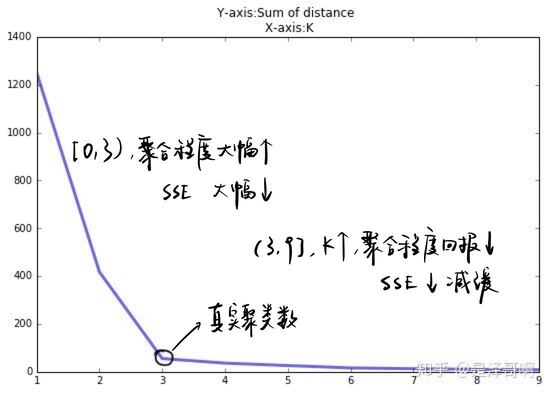

**2. 轮廓系数(silhouette coefficient)**

- 轮廓系数范围在[-1,1]之间。该值越大，越合理。
- si接近1，则说明样本i聚类合理；si接近-1，则说明样本i更应该分类到另外的簇；若si 近似为0，则说明样本i在两个簇的边界上。
- 所有样本的si的均值称为**聚类结果**的轮廓系数，是该聚类是否合理、有效的度量。
- 使用轮廓系数(silhouette coefficient)来确定，选择使系数较大所对应的k值。

sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)

**3. Gap statistic**

https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/1467-9868.00293

https://github.com/milesgranger/gap_statistic

#### 核函数

基于欧式距离的 K-means 假设了了各个数据簇的数据具有一样的的先验概率并呈现球形分布，但这种分布在实际生活中并不常见。面对非凸的数据分布形状时我们可以引入核函数来优化，这时算法又称为核 K-means 算法，是核聚类方法的一种。核聚类方法的主要思想是通过一个非线性映射，将输入空间中的数据点映射到高位的特征空间中，并在新的特征空间中进行聚类。非线性映射增加了数据点线性可分的概率，从而在经典的聚类算法失效的情况下，通过引入核函数可以达到更为准确的聚类结果

#### K-means++

算法步骤：

- 随机选取一个中心点  ；
- 计算数据到之前n个聚类中心最远的距离$D(x)$，并以一定概率$ \frac{D(x)^2}{\sum{D(x)^2}} $选择新中心点$a_i$；
- 重复第二步。

K-means++ 就是选择离已选中心点最远的点。这也比较符合常理，聚类中心当然是互相离得越远越好。

[Back to Chapter4 contents](#40)

[Back to Total contents](#0)

### <div id="43">K-Means实例 - Mall Customers Segmentation: Clustering Model</div>

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.

**Spending Score** is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.



**Inspiration**

By the end of this case study , you would be able to answer below questions.

1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.

2- Who are your target customers with whom you can start marketing strategy [easy to converse]

3- How the marketing strategy works in real world

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
# if non-null - for cleaning
data.info() # or
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
# ID is useless,drop
# X is Age, Annual Income, Spending Score
# 因为是聚类算法->无监督->没有Y

data.drop(columns='CustomerID',axis=1,inplace=True)

In [27]:
# Classified by Gender,clustered by age and income

dataF=data[data['Gender']=='Female'].reset_index(drop=True)
dataM=data[data['Gender']=='Male'].reset_index(drop=True)
dataF.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Female,20,16,6
1,Female,23,16,77
2,Female,31,17,40
3,Female,22,17,76
4,Female,35,18,6


In [28]:
dataM.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Male,64,19,3
3,Male,67,19,14
4,Male,37,20,13


In [200]:
from sklearn.cluster import KMeans

X_f=dataF.iloc[:,[2,3]].values
X_m=dataM.iloc[:,[2,3]].values

# inertia_:Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
# within-cluster sum of squared
wcss_f=[]
wcss_m=[]

# 手肘法 作图看拐点
def drawElbow(df,list):
    for i in range(1,11):
        km_model=KMeans(n_clusters=i, init='k-means++', random_state=0)
        km_model.fit(df)
        list.append(km_model.inertia_)
        
drawElbow(X_f,wcss_f)
drawElbow(X_m,wcss_m)

E:\Anaconda3\envs\python3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "
E:\Anaconda3\envs\python3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'wscc')

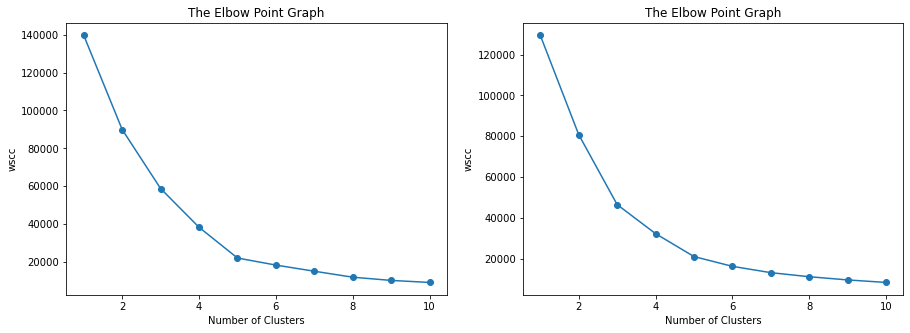

In [164]:
# plot an elbow graph
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('The Elbow Point Graph')
plt.plot(range(1,11), wcss_f, 'o-')
plt.xlabel("Number of Clusters")
plt.ylabel('wscc')

plt.subplot(1,2,2)
plt.title('The Elbow Point Graph')
plt.plot(range(1,11), wcss_m, 'o-')
plt.xlabel("Number of Clusters")
plt.ylabel('wscc')

In [201]:
km1=KMeans(n_clusters=5, init='k-means++', random_state=0)
km2=KMeans(n_clusters=5, init='k-means++', random_state=0)

km1.fit(X_f)
km2.fit(X_m)

Y_f= km1.fit_predict(X_f)
Y_m= km2.fit_predict(X_m)

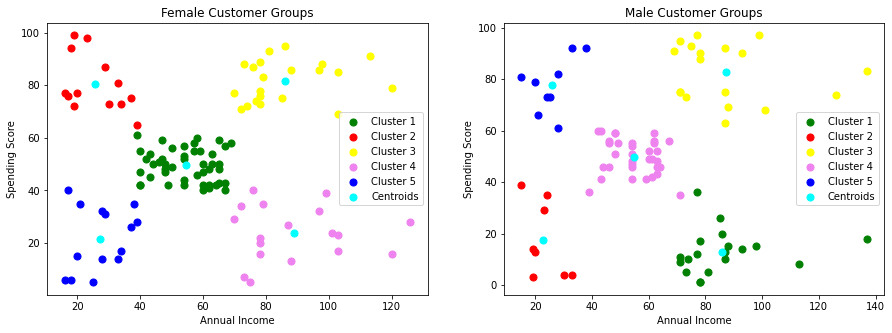

In [203]:
# plot clusters and Centroids

from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(X_f[Y_f==0,0], X_f[Y_f==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X_f[Y_f==1,0], X_f[Y_f==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X_f[Y_f==2,0], X_f[Y_f==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X_f[Y_f==3,0], X_f[Y_f==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X_f[Y_f==4,0], X_f[Y_f==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], s=50, c='cyan', label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Female Customer Groups')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X_m[Y_m==0,0], X_m[Y_m==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X_m[Y_m==1,0], X_m[Y_m==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X_m[Y_m==2,0], X_m[Y_m==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X_m[Y_m==3,0], X_m[Y_m==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X_m[Y_m==4,0], X_m[Y_m==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], s=50, c='cyan', label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Female Customer Groups')
plt.title('Male Customer Groups')

plt.legend()

E:\Anaconda3\envs\python3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\python3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Clusters')

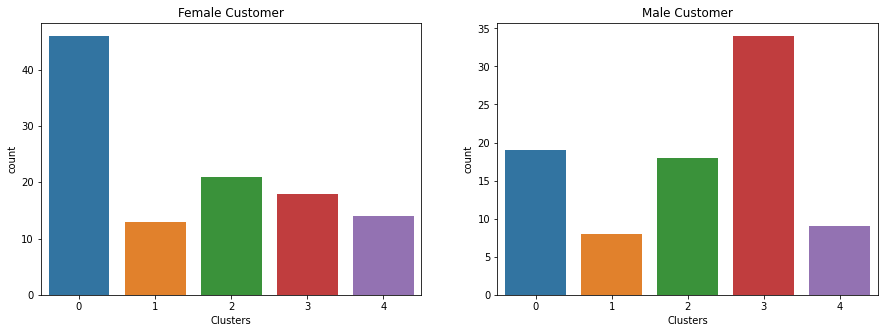

In [204]:
import seaborn as sns

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(Y_f).set_title('Female Customer')
plt.xlabel('Clusters')

plt.subplot(1,2,2)
sns.countplot(Y_m).set_title('Male Customer')
plt.xlabel('Clusters')

In [209]:
cdf['Female count']=pd.Series(km1.labels_).value_counts()
cdf['Male count']=pd.Series(km2.labels_).value_counts()
cdf=pd.concat([cdf['Female count'], cdf['Male count']], axis=1)
cdf

,Female count,Male count
0,46,19
1,13,8
2,21,18
3,18,34
4,14,9


K-Means algorithm generated the following clusters:

Female customers:
- medium income, medium spending score 46
- low income, high spending score 13
- high income, high spending score 21
- high income, low spending score 18
- low income, low spending score 14

Male customers:
- high income, low spending score 19
- low income, low spending score 8
- high income, high spending score 18 
- medium income, medium spending score 34
- low income, high spending score 9

In [197]:
# 3D
X_f=dataF.iloc[:,[1,2,3]].values
X_m=dataM.iloc[:,[1,2,3]].values

km1=KMeans(n_clusters=5, init='k-means++', random_state=0)
km2=KMeans(n_clusters=5, init='k-means++', random_state=0)

km1.fit(X_f)
km2.fit(X_m)

Y_f= km1.fit_predict(X_f)
Y_m= km2.fit_predict(X_m)

E:\Anaconda3\envs\python3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda3\envs\python3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Clusters')

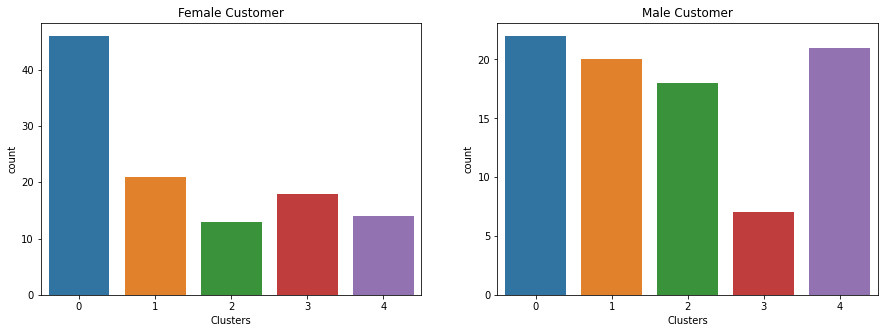

In [199]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(Y_f).set_title('Female Customer')
plt.xlabel('Clusters')

plt.subplot(1,2,2)
sns.countplot(Y_m).set_title('Male Customer')
plt.xlabel('Clusters')

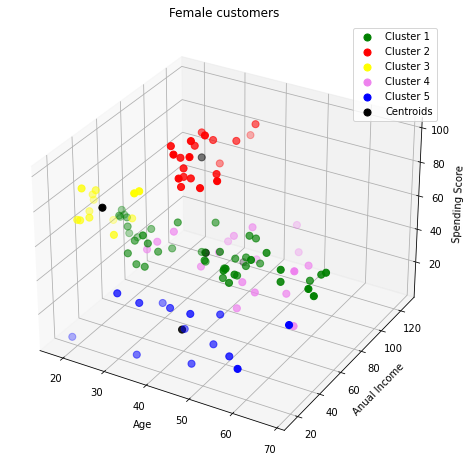

In [191]:
# plot clusters and Centroids
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

# ax.subplot(1,2,1)
ax.scatter(X_f[Y_f==0,0], X_f[Y_f==0,1],X_f[Y_f==0,2], s=50, c='green', label='Cluster 1')
ax.scatter(X_f[Y_f==1,0], X_f[Y_f==1,1],X_f[Y_f==1,2], s=50, c='red', label='Cluster 2')
ax.scatter(X_f[Y_f==2,0], X_f[Y_f==2,1],X_f[Y_f==2,2], s=50, c='yellow', label='Cluster 3')
ax.scatter(X_f[Y_f==3,0], X_f[Y_f==3,1],X_f[Y_f==3,2], s=50, c='violet', label='Cluster 4')
ax.scatter(X_f[Y_f==4,0], X_f[Y_f==4,1],X_f[Y_f==4,2], s=50, c='blue', label='Cluster 5')

# plot the centroids
ax.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1],km1.cluster_centers_[:,2], s=50, c='black', label='Centroids')

ax.set_xlabel('Age')
ax.set_ylabel('Anual Income')
ax.set_zlabel('Spending Score')
ax.set_title('Female customers')
ax.legend()

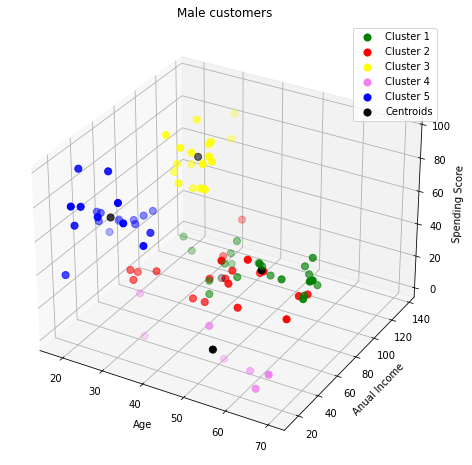

In [190]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

# ax.subplot(1,2,1)
ax.scatter(X_m[Y_m==0,0], X_m[Y_m==0,1],X_m[Y_m==0,2], s=50, c='green', label='Cluster 1')
ax.scatter(X_m[Y_m==1,0], X_m[Y_m==1,1],X_m[Y_m==1,2], s=50, c='red', label='Cluster 2')
ax.scatter(X_m[Y_m==2,0], X_m[Y_m==2,1],X_m[Y_m==2,2], s=50, c='yellow', label='Cluster 3')
ax.scatter(X_m[Y_m==3,0], X_m[Y_m==3,1],X_m[Y_m==3,2], s=50, c='violet', label='Cluster 4')
ax.scatter(X_m[Y_m==4,0], X_m[Y_m==4,1],X_m[Y_m==4,2], s=50, c='blue', label='Cluster 5')

# plot the centroids
ax.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1],km2.cluster_centers_[:,2], s=50, c='black', label='Centroids')

ax.set_xlabel('Age')
ax.set_ylabel('Anual Income')
ax.set_zlabel('Spending Score')
ax.set_title('Male customers')
ax.legend()

[Back to Chapter4 contents](#40)

[Back to Total contents](#0)

## <div id="5">5. KNN K-近邻 Classification</div>

Supervised learning

核心思想是用距离最近的k个样本数据的分类来代表目标数据的分类。

KNN是**惰性学习法**：没有明显的训练过程，边测试边训练

https://blog.csdn.net/moxigandashu/article/details/71169991

存在一个训练样本集，这个数据训练样本的数据集合中的每个样本都包含数据的特征和目标变量（即分类值），输入新的不含目标变量的数据，将该数据的特征与训练样本集中每一个样本进行比较，找到最相似的k个数据，这k个数据出席那次数最多的分类，即输入的具有特征值的数据的分类。

例如，训练样本集中包含一系列数据，这个数据包括样本空间位置（特征）和分类信息（即目标变量，属于红色三角形还是蓝色正方形），要对中心的绿色数据的分类。运用kNN算法思想，距离最近的k个样本的分类来代表测试数据的分类，那么：
当k=3时，距离最近的3个样本在实线内，具有2个红色三角和1个蓝色正方形，因此将它归为红色三角。
当k=5时，距离最近的5个样本在虚线内，具有2个红色三角和3个蓝色正方形，因此将它归为蓝色正方形。

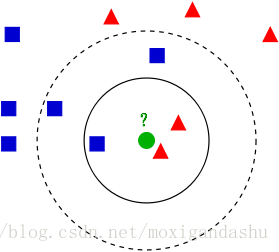

**算法步骤**

- 收集数据：确定训练样本集合测试数据；
- 计算测试数据和训练样本集中每个样本数据的距离；

常用距离公式

欧式：$d(x,y)=\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}$

曼哈顿：$d(x,y)=\sum_{i=1}^{n}|x_i-y_i|$

- 按照距离递增的顺序排序；
- 选取距离最近的k个点；
- 确定这k个点中分类信息的频率；
- 返回前k个点中出现频率最高的分类，作为当前测试数据的分类。

**优缺点**

- K值不同，结果不同（优化：交叉验证法,gridSreachCV）,一般不超过20。
>注意：如果k值和训练样本数一致，导致结果趋近于类别多的样本所在的类别。
- 复杂度较高：M个训练样本，N个测试样本，每一个都要计算。（优化：涉及到距离计算与排序可以以质心来代替，删除某些相差很大的类后再根据普通的knn计算）
- 当样本不平衡时，对稀有类别的预测准确率低。样本不均衡是根据4:1的比例来判断。（优化：可以在实例化的时候，将权重weights设置为distance）

### <div id="50">Contents</div>
[算法优化](#51) [KNN实例](#52)

### <div id="51">算法优化 - Cross validation, K-fold</div>

重采样，k折交叉验证是最基本的cv方法。是将训练集随机分成K份，取其中一份为验证集评估模型，其余k-1份为训练集训练模型，重复该步骤k次，每次取一份不同的子集为验证集，最终得到k个不同的模型和k个评分，综合这k个模型的表现（平均得分或者其他）评估模型在当前问题中的优劣。

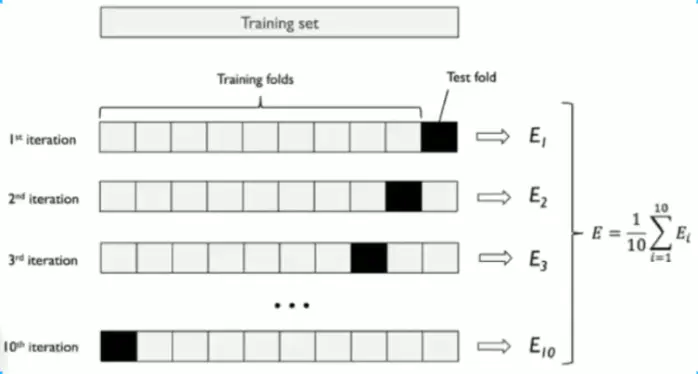

### <div id="52">KNN实例<div>

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

My workflow:
- import the dataset
- data exploration and cleaning
- build model, predict, validation
- Visualize

dataset: tested.csv

https://www.kaggle.com/c/titanic

https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# KNN
from sklearn.neighbors import KNeighborsClassifier

In [9]:
data=pd.read_csv("tested.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [39]:
data.describe(include=['O']) # 仅显示离散型变量

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [55]:
# Cleaning

# Y is Survived

data_a=data.drop(['PassengerId','Ticket','Name'],axis=1) # Useless columns: PassengerId, Ticket, Name

data_a=data_a.dropna(subset=['Age','Fare']) # drop null Age rows

data_a['Sex']=data_a['Sex'].map({'male':0,'female':1}) # sex{male:0,female:1}
data_a['Embarked']=data_a['Embarked'].map({'C':0,'Q':1,'S':2}) # Embarked{C:0,Q:1,S:2}

data_a['Cabin']=data_a['Cabin'].apply(lambda x:1 if pd.isnull(x) else 0) # if cabin non-null:0, else:1
data_a.reset_index(drop=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,34.5,0,0,7.8292,1,1
1,1,3,1,47.0,1,0,7.0000,1,2
2,0,2,0,62.0,0,0,9.6875,1,1
3,0,3,0,27.0,0,0,8.6625,1,2
4,1,3,1,22.0,1,1,12.2875,1,2
...,...,...,...,...,...,...,...,...,...
326,1,3,1,3.0,1,1,13.7750,1,2
327,1,1,1,37.0,1,0,90.0000,0,1
328,1,3,1,28.0,0,0,7.7750,1,2
329,1,1,1,39.0,0,0,108.9000,0,0


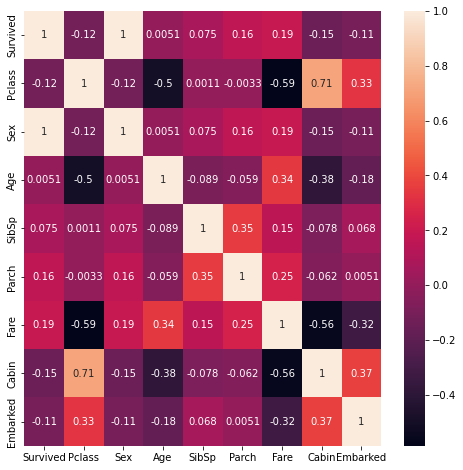

In [81]:
# Survived and sex

corr=data_a.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)
plt.show()

In [77]:
X,y=data_a.iloc[:,1:8],data_a.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# gridSearchCV
score=[]
for i in range(1,20):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    ms=model.score(X_test,y_test)
    score.append(ms)
    
print("The best k value is",score.index(max(score))+1)

The best k value is 1


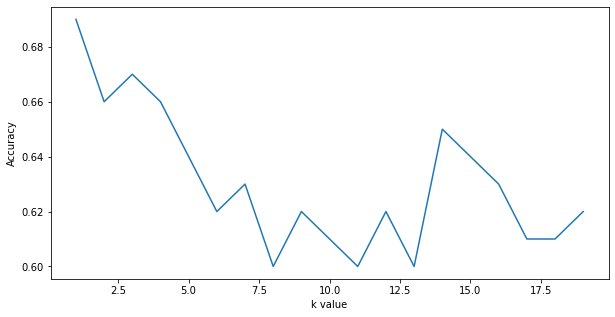

In [80]:
plt.figure(figsize=(10,5))
plt.plot(range(1,20),score)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()

In [85]:
# model build
model=KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
model.score(X_test,y_test)

0.69

[Back to Chapter5 contents](#50)

[Back to Total contents](#0)

## <div id="6">6. 朴素贝叶斯 Naïve Bayes Classification</div>

https://zhuanlan.zhihu.com/p/26262151

**算法原理**

朴素贝叶斯法对条件概率分布做了条件独立性的假设。由于这是一个较强的假设，使得朴素贝叶斯法变得简单，但有时会牺牲一定的分类准确率。

$$P(B|A)=\frac{(P(A|B)P(B)}{P(A)}$$

$$P(类别|特征)=\frac{(P(特征|类别)P(类别)}{P(特征)}$$

**优缺点**

- 算法逻辑简单,易于实现
- 分类过程中时空开销小

- 理论上，朴素贝叶斯模型与其他分类方法相比具有最小的误差率。但是实际上并非总是如此，这是因为朴素贝叶斯模型假设属性之间相互独立，这个假设在实际应用中往往是不成立的，在属性个数比较多或者属性之间相关性较大时，分类效果不好。
- 而在属性相关性较小时，朴素贝叶斯性能最为良好。对于这一点，有半朴素贝叶斯之类的算法通过考虑部分关联性适度改进。

**分类**

naive_bayes.BernoulliNB(*[, alpha, ...]) Naive Bayes classifier for multivariate Bernoulli models.

naive_bayes.CategoricalNB(*[, alpha, ...]) Naive Bayes classifier for categorical features.

naive_bayes.ComplementNB(*[, alpha, ...]) The Complement Naive Bayes classifier described in Rennie et al. (2003).

naive_bayes.GaussianNB(*[, priors, ...]) Gaussian Naive Bayes (GaussianNB).

naive_bayes.MultinomialNB(*[, alpha, ...]) Naive Bayes classifier for multinomial models.

GaussianNB，MultinomialNB和BernoulliNB，这三个类适用的分类场景各不相同，一般来说，如果样本特征的分布大部分是连续值，使用GaussianNB会比较好。如果如果样本特征的分大部分是多元离散值，使用MultinomialNB比较合适。而如果样本特征是二元离散值或者很稀疏的多元离散值，应该使用BernoulliNB。

### <div id="60">Contents</div>
[NB实例](#61) [NB in NLP](#62)

### <div id="61">NB实例</div>

https://flyhigher.top/develop/1989.html

https://codeshellme.github.io/2020/11/ml-nb2/

In [92]:
# Gaussian Naive Bayes
# Titanic dataset
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
acc_gaussian = round(clf.score(X_train, y_train) * 100, 2)
acc_gaussian

100.0

### <div id="62">NB in NLP</div>

https://flyhigher.top/develop/1989.html

https://codeshellme.github.io/2020/11/ml-nb2/

## <div id="7">7. 决策树 Desicion tree Classification</div>

https://easyai.tech/ai-definition/decision-tree/

https://blog.csdn.net/jiaoyangwm/article/details/79525237

[Back to Chapter6 contents](#60)

[Back to Total contents](#0)